In [31]:
import pandas as pd
import numpy as np
data = pd.read_csv("crime_data.csv")
print(data.head())

       States/UTs          District  Year  Murder  Attempt to commit Murder  \
0  Andhra Pradesh         Anantapur  2014     134                       171   
1  Andhra Pradesh          Chittoor  2014      84                       170   
2  Andhra Pradesh          Cuddapah  2014      80                       162   
3  Andhra Pradesh     East Godavari  2014      64                        84   
4  Andhra Pradesh  Guntakal Railway  2014      14                         4   

   Culpable Homicide not amounting to Murder  \
0                                          8   
1                                          2   
2                                          1   
3                                          2   
4                                          0   

   Attempt to commit Culpable Homicide  Rape  Custodial Rape  \
0                                    0    35               0   
1                                    0    32               0   
2                                    0    28

In [10]:
data["Rape"] = data["Rape"] + data["Custodial Rape"] + data["Custodial_Gang Rape"]
drop_tables = ["Custodial_Gang Rape", "Custodial Rape", "Rape other than Custodial"]
data = data.drop(drop_tables, axis=1)

In [5]:
print(data.head())

       States/UTs          District  Year  Murder  Attempt to commit Murder  \
0  Andhra Pradesh         Anantapur  2014     134                       171   
1  Andhra Pradesh          Chittoor  2014      84                       170   
2  Andhra Pradesh          Cuddapah  2014      80                       162   
3  Andhra Pradesh     East Godavari  2014      64                        84   
4  Andhra Pradesh  Guntakal Railway  2014      14                         4   

   Culpable Homicide not amounting to Murder  \
0                                          8   
1                                          2   
2                                          1   
3                                          2   
4                                          0   

   Attempt to commit Culpable Homicide  Rape  Custodial_Other Rape  \
0                                    0    35                     0   
1                                    0    32                     0   
2                         

In [17]:
data_states = data["States/UTs"].unique()
murder_by_state={}
for state in data_states:
    data_state = data[data["States/UTs"] == state]
    total_murder = data_state["Murder"].sum()
    murder_by_state[state] = total_murder
print(murder_by_state)

{'Andhra Pradesh': 2350, 'Arunachal Pradesh': 172, 'Assam': 2902, 'Bihar': 6806, 'Chhattisgarh': 1996, 'Goa': 68, 'Gujarat': 2248, 'Haryana': 2212, 'Himachal Pradesh': 260, 'Jammu & Kashmir': 312, 'Jharkhand': 3316, 'Karnataka': 3272, 'Kerala': 734, 'Madhya Pradesh': 4548, 'Maharashtra': 5340, 'Manipur': 192, 'Meghalaya': 318, 'Mizoram': 84, 'Nagaland': 116, 'Odisha': 2900, 'Punjab': 1534, 'Rajasthan': 3274, 'Sikkim': 24, 'Tamil Nadu': 3610, 'Telangana': 2616, 'Tripura': 280, 'Uttar Pradesh': 10300, 'Uttarakhand': 436, 'West Bengal': 4740, 'A&N Islands': 16, 'Chandigarh': 48, 'D&N Haveli': 8, 'Daman & Diu': 14, 'Delhi UT': 1172, 'Lakshadweep': 0, 'Puducherry': 50}


In [37]:
new_table = data.pivot_table(index="States/UTs", values="Murder",aggfunc=np.std)
print(new_table)

States/UTs
A&N Islands            3.162278
Andhra Pradesh       246.113166
Arunachal Pradesh     18.599377
Assam                261.238661
Bihar                488.862506
Chandigarh             0.000000
Chhattisgarh         179.626213
D&N Haveli             0.000000
Daman & Diu            3.214550
Delhi UT             127.905146
Goa                   14.094916
Gujarat              170.149180
Haryana              213.522466
Himachal Pradesh      31.118055
Jammu & Kashmir       27.581317
Jharkhand            309.212652
Karnataka            264.211567
Kerala                75.021613
Lakshadweep            0.000000
Madhya Pradesh       299.304267
Maharashtra          382.899893
Manipur               26.699677
Meghalaya             42.391037
Mizoram               12.393547
Nagaland              16.461157
Odisha               232.851330
Puducherry             9.712535
Punjab               138.062446
Rajasthan            244.705613
Sikkim                 4.690416
Tamil Nadu           270.4467

In [29]:
new_table["At Office premises"] = new_table["At Office premises"].apply(lambda x: x*100)

print(new_table.head())

## Use of Matplotlib 

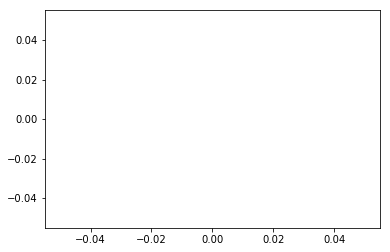

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot()
plt.show()

In [42]:
x_values = new_table.index
print(x_values)

Index(['A&N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'D&N Haveli', 'Daman & Diu', 'Delhi UT',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='States/UTs')


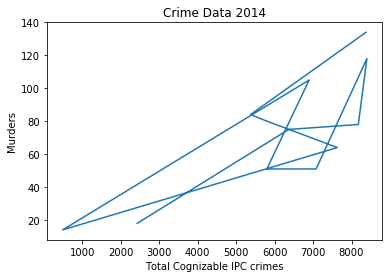

In [47]:
x_values = data["Total Cognizable IPC crimes"].head(12)
y_values = data["Murder"].head(12)
plt.plot(x_values, y_values)
plt.xlabel("Total Cognizable IPC crimes")
plt.ylabel("Murders")
plt.title("Crime Data 2014")
plt.show()
